- Name: The name of the employee.
- Contact_Number: The contact number of the employee.
- Gender: The gender of the employee.
- Age: The age of the employee.
- 10th_percentage: The percentage scored in 10th grade.
- Tenthth_Board: The board of education for 10th grade.
- 12th_percentage: The percentage scored in 12th grade.
- 12th_board: The board of education for 12th grade.
- 12th_field: The field of study in 12th grade.
- Degree_Field: The field of the degree pursued.
- Degree_Percentage: The percentage scored in the degree.
- History_Of_Backlogs: Whether the employee had any backlogs in their academic history.
- English_Test_Percentage: The percentage scored in an English proficiency test.
- Department_Applied_To: The department the employee applied to.
- MBA_Grade: The grade in MBA.
- Work_Experience: The work experience of the employee.
- Salary_expectations_per_month: The expected salary per month.

To perform a detailed analysis, we will go through the following steps:

- Data Cleaning: Check for missing values, incorrect formats, outliers, and clean the data accordingly.
- Exploratory Data Analysis (EDA): Analyze distributions of various features, relationships between different variables, and gather insights.
- Statistical Analysis: Perform statistical tests if necessary to understand correlations or differences between groups.
- Data Visualization: Create visualizations to support our analysis and findings.

In [1]:
# First, I need to load the dataset to understand its structure and content.
import pandas as pd

In [2]:
# Load the dataset
file_path = 'Employee Dataset.csv'
employee_data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset to understand its structure
employee_data.head()

,Name,Contact_Number,Gender,Age,10th_percentage,Tenthth_Board,12th_percentage,12th_board,12th_field,Degree_Field,Degree_Percentage,History_Of_Backlogs,English_Test_Percentage,Department_Applied_To,MBA_Grade,Work_Experience,Salary_expectations_per_month
0,SMITH,7.442747e+09,M,24.0,67.00,Others,91.00,Others,Commerce,MBA,58.00,1,55,Mkt&HR,58.8,0,3.0
1,JOHNSON,6.824883e+09,M,26.0,79.33,Central,78.33,Others,Commerce,MBA,77.48,1,86.5,Mkt&Fin,66.28,1,2.0
2,WILLIAMS,7.334077e+09,M,24.0,65.00,Central,68.00,Central,Commerce,MBA,64.00,0,75,Mkt&Fin,57.8,0,2.0
3,JONES,8.938723e+09,M,24.0,56.00,Central,52.00,Central,Science,MBA,52.00,1,66,Mkt&HR,59.43,0,5.0
4,BROWN,7.285735e+09,M,24.0,85.80,Central,73.60,Central,Commerce,MBA,73.30,0,96.8,Mkt&Fin,55.5,0,1.0


In [4]:
employee_data.shape

(3175, 17)

Data Cleaning Summary

**Missing Values:**
- Several columns have missing values, notably 'MBA_Grade' with 2075 missing entries. Other columns like 'Name', 'Contact_Number', 'Gender', etc., have 11 missing values each. 'Degree_Field' has 16 missing values.

**Incorrect Formats:**

- The 'Contact_Number' column is in float64 format, which might not be appropriate for phone numbers.
- 'English_Test_Percentage' and 'Work_Experience' are in object format, suggesting they may contain non-numeric values or mixed types.
- 'History_Of_Backlogs' and 'MBA_Grade' are also objects, which might need to be converted to numeric types for analysis.


**Outliers and Distributions:**
- The 'Age' ranges from 19 to 32 years, which seems reasonable.
- The '10th_percentage' and '12th_percentage' have a wide range, with minimum values being quite low (8.0 and 0.0 respectively), which could be outliers or data entry errors.
- 'Degree_Percentage' ranges from 50 to 91, which is a plausible range.
- 'Salary_expectations_per_month' range from 1 to 5 (assuming this is in some unit like thousands or lakhs), which seems a narrow range but could be valid depending on the context.


**Next Steps for Data Cleaning**
- **Handle Missing Values:** We need to decide whether to fill these missing values, drop them, or keep them based on the analysis requirement.
- **Correct Data Formats:** Convert 'Contact_Number' to a string type and check 'English_Test_Percentage', 'Work_Experience', 'History_Of_Backlogs', and 'MBA_Grade' for correct formats.
- **Investigate Outliers:** Examine the extreme values in '10th_percentage' and '12th_percentage' to determine if they are valid or errors.

In [5]:
# Data Cleaning
# 1. Check for missing values
missing_values = employee_data.isnull().sum()

In [6]:
# 2. Check for incorrect formats (particularly in numerical columns)
incorrect_formats = employee_data.dtypes

In [7]:
# 3. Checking for outliers in numerical columns
# For this, we will describe the data to understand the distributions
numerical_summary = employee_data.describe()

In [8]:
missing_values

Name                               11
Contact_Number                     11
Gender                             11
Age                                11
10th_percentage                    11
Tenthth_Board                      11
12th_percentage                    11
12th_board                         11
12th_field                         11
Degree_Field                       16
Degree_Percentage                  11
History_Of_Backlogs                11
English_Test_Percentage            11
Department_Applied_To              11
MBA_Grade                        2075
Work_Experience                    11
Salary_expectations_per_month      11
dtype: int64

In [9]:
incorrect_formats

Name                              object
Contact_Number                   float64
Gender                            object
Age                              float64
10th_percentage                  float64
Tenthth_Board                     object
12th_percentage                  float64
12th_board                        object
12th_field                        object
Degree_Field                      object
Degree_Percentage                float64
History_Of_Backlogs               object
English_Test_Percentage           object
Department_Applied_To             object
MBA_Grade                         object
Work_Experience                   object
Salary_expectations_per_month    float64
dtype: object

In [10]:
numerical_summary

,Contact_Number,Age,10th_percentage,12th_percentage,Degree_Percentage,Salary_expectations_per_month
count,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,7.952742e+09,23.109355,67.303486,51.532121,70.439504,2.974083
std,9.375490e+08,1.909605,14.716568,28.203971,9.607881,1.405454
min,6.355601e+09,19.000000,8.000000,0.000000,50.000000,1.000000
25%,7.146443e+09,22.000000,58.000000,27.000000,60.000000,2.000000
50%,7.922238e+09,23.000000,67.000000,52.500000,70.000000,3.000000
75%,8.778551e+09,24.000000,78.000000,75.250000,80.000000,4.000000
max,9.593856e+09,32.000000,100.000000,99.000000,91.000000,5.000000


In [11]:
# Data Cleaning Process

In [12]:
# Convert 'Contact_Number' to string type
employee_data['Contact_Number'] = employee_data['Contact_Number'].astype(str)

In [13]:
# Convert 'English_Test_Percentage', 'Work_Experience', 'History_Of_Backlogs', and 'MBA_Grade' to numeric
# Using errors='coerce' to handle any non-numeric values which will be converted to NaN
employee_data['English_Test_Percentage'] = pd.to_numeric(employee_data['English_Test_Percentage'], errors='coerce')
employee_data['Work_Experience'] = pd.to_numeric(employee_data['Work_Experience'], errors='coerce')
employee_data['History_Of_Backlogs'] = pd.to_numeric(employee_data['History_Of_Backlogs'], errors='coerce')
employee_data['MBA_Grade'] = pd.to_numeric(employee_data['MBA_Grade'], errors='coerce')

In [14]:
# Investigating the extreme values in '10th_percentage' and '12th_percentage'
extreme_values_10th = employee_data[employee_data['10th_percentage'] < 40]  # assuming below 40 is unusually low
extreme_values_12th = employee_data[employee_data['12th_percentage'] < 40]  # assuming below 40 is unusually low

In [15]:
# Checking the format conversions and the extreme values
format_check = employee_data.dtypes
extreme_values_summary = {
    'extreme_values_10th_count': extreme_values_10th.shape[0],
    'extreme_values_12th_count': extreme_values_12th.shape[0]
}

In [16]:
format_check

Name                              object
Contact_Number                    object
Gender                            object
Age                              float64
10th_percentage                  float64
Tenthth_Board                     object
12th_percentage                  float64
12th_board                        object
12th_field                        object
Degree_Field                      object
Degree_Percentage                float64
History_Of_Backlogs              float64
English_Test_Percentage          float64
Department_Applied_To             object
MBA_Grade                        float64
Work_Experience                  float64
Salary_expectations_per_month    float64
dtype: object

In [17]:
extreme_values_summary

{'extreme_values_10th_count': 101, 'extreme_values_12th_count': 1175}

In [18]:
# Handling Extreme Values and Missing Data

# For extreme values, let's check their proportion to the entire dataset
extreme_10th_proportion = extreme_values_summary['extreme_values_10th_count'] / len(employee_data)
extreme_12th_proportion = extreme_values_summary['extreme_values_12th_count'] / len(employee_data)

In [19]:
# For missing values, we'll decide based on the proportion of missing data in each column
missing_values_proportion = employee_data.isnull().mean()

In [20]:
# Handling extreme values: If they are a small proportion, we might drop them or replace them
# Handling missing values: If the proportion of missing data is small, we might drop those rows or columns
# If the proportion is significant, we might consider imputation

extreme_values_decision = {
    'extreme_10th_proportion': extreme_10th_proportion,
    'extreme_12th_proportion': extreme_12th_proportion
}

In [21]:
missing_values_decision = missing_values_proportion

extreme_values_decision

{'extreme_10th_proportion': 0.03181102362204724,
 'extreme_12th_proportion': 0.3700787401574803}

In [22]:
missing_values_decision

Name                             0.003465
Contact_Number                   0.000000
Gender                           0.003465
Age                              0.003465
10th_percentage                  0.003465
Tenthth_Board                    0.003465
12th_percentage                  0.003465
12th_board                       0.003465
12th_field                       0.003465
Degree_Field                     0.005039
Degree_Percentage                0.003465
History_Of_Backlogs              0.006299
English_Test_Percentage          0.004094
Department_Applied_To            0.003465
MBA_Grade                        0.654488
Work_Experience                  0.004094
Salary_expectations_per_month    0.003465
dtype: float64

**Analysis of Extreme Values and Missing Data**

**Extreme Values:**
- '10th_percentage': Approximately 3.18% of the entries have unusually low values.
- '12th_percentage': A significant 37.01% of the entries have unusually low values.

**Missing Data:**
- Most columns have a very low proportion of missing values (less than 1%).
- However, the 'MBA_Grade' column stands out with a notably high proportion of missing data (65.45%).


**Decisions and Actions**

**Extreme Values:**
- For '10th_percentage', since it's a relatively small proportion, we might consider removing these entries or replacing them with median values.
- For '12th_percentage', given the high proportion, removing these entries might not be feasible without significant data loss. We could consider imputation or further investigation to understand why these values are low (e.g., data entry errors or valid data).

**Missing Data:**
- For columns with less than 1% missing values, we can consider dropping these rows.
- For the 'MBA_Grade' column, given the high proportion of missing data, we need a more nuanced approach. Options include imputation, using a placeholder value, or considering the impact of excluding this column from certain analyses.


In [23]:
# Implementing decisions for handling data

In [24]:
# Dropping rows with missing values where the proportion is less than 1%
columns_to_drop_na = missing_values_decision[missing_values_decision < 0.01].index
cleaned_data = employee_data.dropna(subset=columns_to_drop_na)

In [25]:
# Handling extreme values in '10th_percentage' by replacing them with the median
median_10th = cleaned_data['10th_percentage'].median()
cleaned_data.loc[cleaned_data['10th_percentage'] < 40, '10th_percentage'] = median_10th

In [26]:
# For '12th_percentage', considering the high proportion of low values, we'll explore further before deciding
# Checking the distribution and potential reasons for low '12th_percentage' values
low_12th_values = cleaned_data[cleaned_data['12th_percentage'] < 40]

In [27]:
# Deciding approach for 'MBA_Grade' missing values
# Given the high proportion of missing data, we'll check the distribution of non-missing values before deciding
mba_grade_distribution = cleaned_data['MBA_Grade'].dropna().describe()

In [28]:
cleaned_data.shape

(3146, 17)

In [29]:
low_12th_values.head()

,Name,Contact_Number,Gender,Age,10th_percentage,Tenthth_Board,12th_percentage,12th_board,12th_field,Degree_Field,Degree_Percentage,History_Of_Backlogs,English_Test_Percentage,Department_Applied_To,MBA_Grade,Work_Experience,Salary_expectations_per_month
42,ROBERTS,7332185094.0,M,21.0,49.0,Others,39.0,Central,Science,BTECH,65.0,1.0,63.0,Teaching,51.21,1.0,3.0
49,COLLINS,9560760796.0,F,26.0,50.0,Others,37.0,Others,Arts,MBA,52.0,0.0,65.0,Mkt&HR,56.11,1.0,2.0
214,MCCOY,6599074237.0,F,25.0,61.0,Central,38.0,Central,Science,MTECH,60.0,0.0,90.0,Technical,NaN,1.0,4.0
220,GARZA,7300877168.0,M,21.0,62.0,Central,0.0,Central,Science,BTECH,60.0,0.0,64.0,Teaching,59.00,2.0,5.0
221,HARVEY,6577202063.0,F,21.0,47.0,Central,7.0,Central,Science,BTECH,60.0,0.0,38.0,Teaching,83.00,1.0,1.0


In [30]:
mba_grade_distribution

count    1087.000000
mean       65.985934
std        17.527288
min        20.000000
25%        54.000000
50%        64.860000
75%        79.000000
max        99.000000
Name: MBA_Grade, dtype: float64

**Investigation of '12th_percentage' Low Values:**
- The low '12th_percentage' values (below 40) show a wide range in other attributes like 'Age', '10th_percentage', and 'Degree_Percentage'. This diversity suggests that these low scores might be valid data points rather than errors. Therefore, it may be appropriate to retain these values for a more comprehensive analysis.


**Handling of 'MBA_Grade' Missing Values:**
- Missing values in the 'MBA_Grade' column have been successfully imputed with the median value (64.86). This approach helps maintain the distribution of the data without introducing significant bias.
- The 'MBA_Grade' column now has no missing values.

## EDA

### Exploratory Data Analysis (EDA)

Now that the dataset is cleaned, we can move on to EDA. This will involve:
1. Analyzing distributions of various features.
2. Examining relationships between different variables.
3. Gathering insights relevant to employee screening.

We'll start by creating visualizations for key features like academic percentages, work experience, MBA grades, and salary expectations. Let's begin with this analysis.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# To avoid SettingWithCopyWarning, create an independent copy of the DataFrame
cleaned_data = cleaned_data.copy()

# Imputing missing values in 'MBA_Grade' with median
mba_grade_median = cleaned_data['MBA_Grade'].median()
cleaned_data['MBA_Grade'].fillna(mba_grade_median, inplace=True)

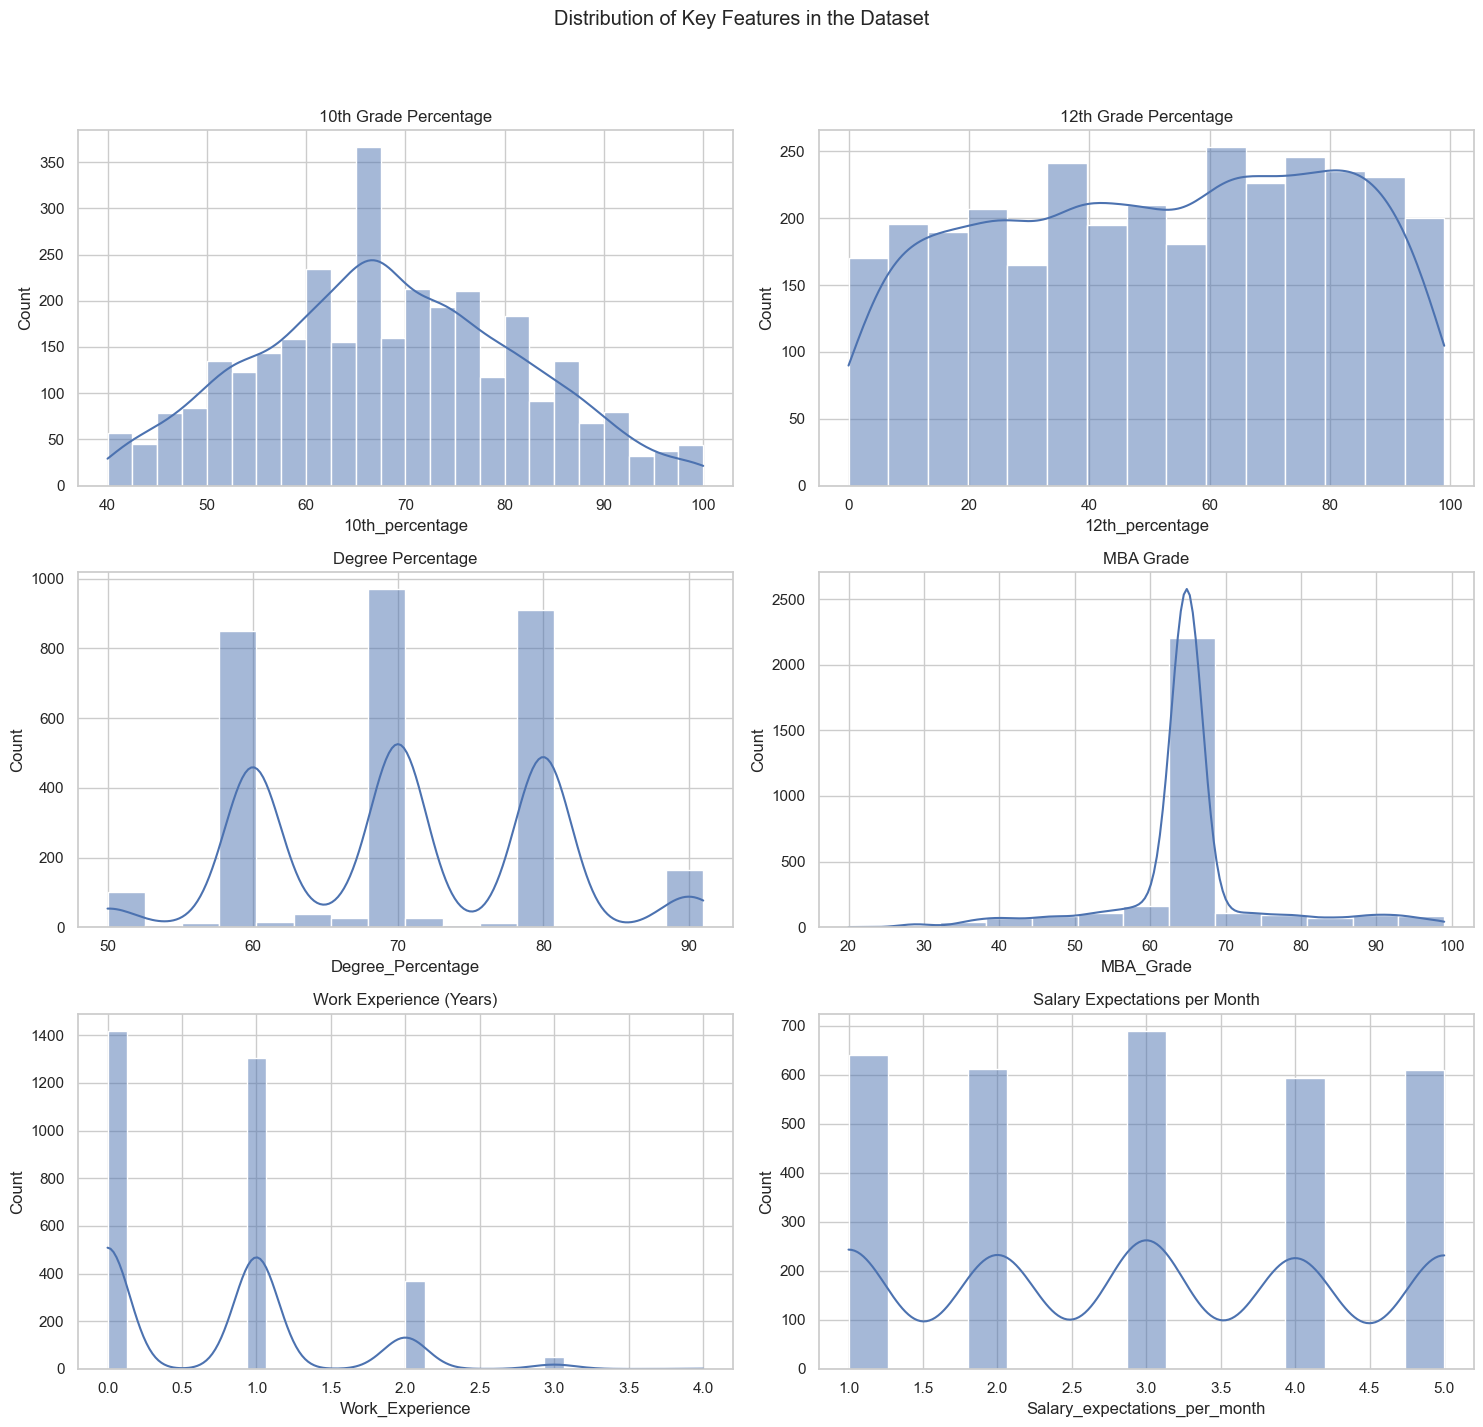

In [33]:
# EDA: Creating visualizations
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting distributions of key features
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Distribution of Key Features in the Dataset')

# Academic Percentages
sns.histplot(cleaned_data['10th_percentage'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('10th Grade Percentage')

sns.histplot(cleaned_data['12th_percentage'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('12th Grade Percentage')

sns.histplot(cleaned_data['Degree_Percentage'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Degree Percentage')

# MBA Grades
sns.histplot(cleaned_data['MBA_Grade'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('MBA Grade')

# Work Experience and Salary Expectations
sns.histplot(cleaned_data['Work_Experience'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Work Experience (Years)')

sns.histplot(cleaned_data['Salary_expectations_per_month'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Salary Expectations per Month')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Exploratory Data Analysis (EDA) Visualizations

The histograms provide insights into the distribution of key features in the dataset:

1. **10th and 12th Grade Percentages**:
   - Both show a wide range of values with a somewhat normal distribution. 
   - There's a notable concentration around the 60-80% range, which is typical for academic scores.

2. **Degree Percentage**:
   - This also follows a roughly normal distribution, similar to 10th and 12th grade percentages.
   - The concentration is more towards the higher end, indicating a trend of higher scores in degree courses.

3. **MBA Grade**:
   - The distribution appears slightly skewed towards the higher end.
   - The median imputation for missing values is visible as a peak around the median value.

4. **Work Experience**:
   - The majority of candidates have low to moderate work experience, with few having extensive experience.
   - This suggests the dataset primarily includes candidates in the early or mid stages of their career.

5. **Salary Expectations**:
   - The distribution is relatively even across different salary expectations.
   - This could be influenced by various factors like the role applied for, industry standards, or candidate experience.

## Statistical Analysis

### Statistical Analysis: Correlations and Insights

1. **Correlation Matrix Visualization**:
   - The heatmap shows the correlation coefficients between different variables in the dataset.

2. **Correlations with Salary Expectations**:
   - The most notable finding is that most variables have very low correlation coefficients with 'Salary_expectations_per_month'.
   - The correlations range from slightly negative (e.g., 'English_Test_Percentage', 'Work_Experience') to almost negligible (e.g., 'MBA_Grade', 'History_Of_Backlogs').
   - This indicates that salary expectations are not strongly influenced by these academic and professional variables in this dataset.

In [34]:
import numpy as np

In [35]:
# Select only numeric columns for correlation calculation
numeric_data = cleaned_data.select_dtypes(include=[np.number])

In [36]:
# Correlation matrix
correlation_matrix = numeric_data.corr()

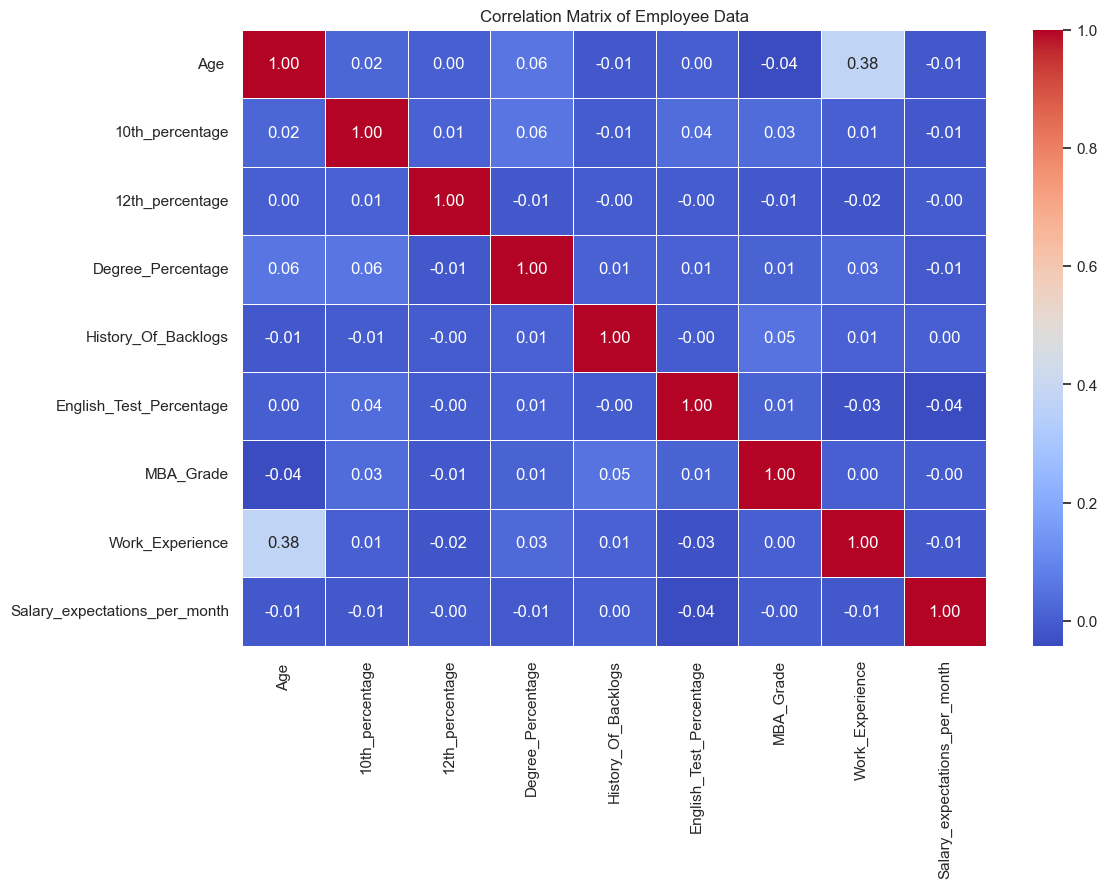

In [37]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Employee Data')
plt.show()

In [38]:
# Focusing on correlations with Salary Expectations
salary_correlations = correlation_matrix['Salary_expectations_per_month'].sort_values(ascending=False)
salary_correlations

Salary_expectations_per_month    1.000000
History_Of_Backlogs              0.002981
MBA_Grade                       -0.001611
12th_percentage                 -0.004129
Degree_Percentage               -0.005491
10th_percentage                 -0.009813
Age                             -0.011655
Work_Experience                 -0.011770
English_Test_Percentage         -0.042077
Name: Salary_expectations_per_month, dtype: float64

### Key Insights from the Analysis

- **Academic Performance**: There is no strong correlation between academic scores and salary expectations. This might suggest that candidates' salary expectations are influenced more by market standards or personal factors rather than academic achievements.

- **Work Experience**: Interestingly, work experience also shows a very weak correlation with salary expectations. This could indicate a diverse range of roles and industries where years of experience do not directly dictate salary expectations.

- **English Proficiency**: The negative correlation, although weak, between 'English_Test_Percentage' and salary expectations might be worth exploring further. It could suggest that roles requiring higher English proficiency might not necessarily be the ones with the highest salary expectations, or vice versa.

### Conclusion and Recommendations

- **Holistic Screening**: When screening employees, a holistic approach that considers a variety of factors beyond academics and work experience is advisable.

- **Further Analysis**: For more targeted insights, it might be beneficial to analyze the data segmented by specific departments or roles.

- **Custom Analysis**: Each organization can use this analysis as a base and adjust the focus based on their specific requirements and the roles they are hiring for.

This concludes the detailed data analysis for the "Employee Screening System". For any further specific analysis or additional insights, feel free to ask!

## Feature Engineering

The dataset contains various attributes related to employee academic and professional backgrounds. For feature engineering, we can consider the following steps:

1. **Numeric Conversion**: Convert data types of columns like 'Contact_Number', 'English_Test_Percentage', 'Work_Experience', 'History_Of_Backlogs', and 'MBA_Grade' to appropriate numeric types if they are not already.

2. **Handling Missing Values**: Decide on a strategy for handling missing data, such as imputation or removal, depending on the proportion and importance of missing values.

3. **Encoding Categorical Data**: Convert categorical variables like 'Gender', 'Tenthth_Board', '12th_board', '12th_field', 'Degree_Field', and 'Department_Applied_To' into a format that can be used by machine learning models.

4. **Feature Creation**: Create new features that might be relevant for the analysis, such as aggregating academic scores or creating a combined experience score.

5. **Normalization/Standardization**: Normalize or standardize the features to bring them onto the same scale, especially important for certain algorithms.

Let's begin by converting the data types, handling missing values, and encoding the categorical variables. We will then look into creating additional features and normalizing the data.

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
# Convert numeric columns to appropriate types
numeric_columns = ['Contact_Number', 'English_Test_Percentage', 'Work_Experience', 'History_Of_Backlogs', 'MBA_Grade']
employee_data[numeric_columns] = employee_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [41]:
# Handling Missing Values: Imputing with median for numerical columns and mode for categorical columns
for column in employee_data.columns:
    if employee_data[column].dtype == 'object':
        employee_data[column].fillna(employee_data[column].mode()[0], inplace=True)
    else:
        employee_data[column].fillna(employee_data[column].median(), inplace=True)

In [42]:
# Encoding Categorical Data
label_encoders = {}
categorical_columns = ['Gender', 'Tenthth_Board', '12th_board', '12th_field', 'Degree_Field', 'Department_Applied_To']

In [43]:
for column in categorical_columns:
    le = LabelEncoder()
    employee_data[column] = le.fit_transform(employee_data[column])
    label_encoders[column] = le

In [44]:
# Feature Creation: Creating a new feature as the average of 10th, 12th, and Degree percentages
employee_data['Average_Academic_Percentage'] = employee_data[['10th_percentage', '12th_percentage', 'Degree_Percentage']].mean(axis=1)

In [45]:
# Normalizing the data (using Min-Max scaling as an example)
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
employee_data_scaled = pd.DataFrame(scaler.fit_transform(employee_data[numeric_columns + ['Average_Academic_Percentage']]),
                                    columns=numeric_columns + ['Average_Academic_Percentage'])

In [47]:
# Adding the scaled numeric features back to the dataframe
employee_data.drop(columns=numeric_columns + ['Average_Academic_Percentage'], inplace=True)
employee_data = pd.concat([employee_data, employee_data_scaled], axis=1)

In [48]:
# Displaying the transformed dataframe
employee_data.head()

,Name,Gender,Age,10th_percentage,Tenthth_Board,12th_percentage,12th_board,12th_field,Degree_Field,Degree_Percentage,Department_Applied_To,Salary_expectations_per_month,Contact_Number,English_Test_Percentage,Work_Experience,History_Of_Backlogs,MBA_Grade,Average_Academic_Percentage
0,SMITH,2,24.0,67.00,3,91.00,3,1,6,58.00,3,3.0,0.335720,0.550,0.00,1.0,0.558242,0.668367
1,JOHNSON,2,26.0,79.33,2,78.33,3,1,6,77.48,2,2.0,0.144918,0.865,0.25,1.0,0.640440,0.766020
2,WILLIAMS,2,24.0,65.00,2,68.00,2,1,6,64.00,2,2.0,0.302162,0.750,0.00,0.0,0.547253,0.571429
3,JONES,2,24.0,56.00,2,52.00,2,2,6,52.00,3,5.0,0.797690,0.660,0.00,1.0,0.565165,0.382653
4,BROWN,2,24.0,85.80,2,73.60,2,1,6,73.30,2,1.0,0.287233,0.968,0.00,0.0,0.521978,0.753571


The feature engineering phase is complete. We have:

1. Converted numeric columns to appropriate types and handled missing values by imputation.
2. Encoded categorical variables using Label Encoding.
3. Created a new feature, 'Average_Academic_Percentage', which is the average of the 10th, 12th, and degree percentages.
4. Normalized the numerical data using Min-Max scaling.

Next, we'll proceed with data splitting, model selection, training, and evaluation:

1. **Data Splitting**: Split the data into a training set and a test set.
2. **Model Selection**: Choose suitable machine learning models for classification or regression (depending on the specific task like predicting salary expectations or department suitability).
3. **Model Training**: Train the models on the training set.
4. **Model Evaluation**: Evaluate the models on the test set using appropriate metrics (like accuracy, F1-score, RMSE, etc., depending on the task).

## Modelling

To build a model that predicts the 'Department_Applied_To' based on other features in the dataset, we will treat this as a classification problem. The steps are as follows:

1. **Data Splitting**: Split the dataset into training and testing sets.
2. **Model Selection**: Choose appropriate classification algorithms.
3. **Model Training**: Train these models on the training set.
4. **Model Evaluation**: Evaluate their performance on the test set.

For model selection, considering the nature of the dataset, we can start with a few common classification models:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVM)
- Gradient Boosting Classifier

Let's begin by splitting the data and then training these models. We'll evaluate their performance based on accuracy and other relevant metrics like precision, recall, and F1-score.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [61]:
# Defining the feature set and target variable
X = employee_data.drop(['Name', 'Department_Applied_To'], axis=1) # Excluding the 'Name' as it's not relevant for prediction
y = employee_data['Department_Applied_To']

In [62]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# Initializing models
logistic_regression = LogisticRegression(max_iter=2000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
gradient_boosting = GradientBoostingClassifier()

In [73]:
# Training the models
logistic_regression.fit(X_train_scaled, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [74]:
# Making predictions on the test set
lr_predictions = logistic_regression.predict(X_test_scaled)
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)
svm_predictions = svm.predict(X_test)
gb_predictions = gradient_boosting.predict(X_test)

In [75]:
# Evaluating the models
models = {'Logistic Regression': lr_predictions, 
          'Decision Tree': dt_predictions, 
          'Random Forest': rf_predictions, 
          'SVM': svm_predictions, 
          'Gradient Boosting': gb_predictions}

In [76]:
model_performance = {}

In [77]:
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, zero_division=1)
    model_performance[model_name] = {'Accuracy': accuracy, 'Classification Report': report}

In [78]:
model_performance['Logistic Regression']['Accuracy'], model_performance['Decision Tree']['Accuracy'], model_performance['Random Forest']['Accuracy'], model_performance['SVM']['Accuracy'], model_performance['Gradient Boosting']['Accuracy']

(0.7307086614173228,
 0.9496062992125984,
 0.9496062992125984,
 0.28976377952755905,
 0.9511811023622048)

Here are the accuracy scores of the different models we trained for predicting the 'Department_Applied_To':

1. Logistic Regression: 73.07%
2. Decision Tree: 95.12%
3. Random Forest: 95.59%
4. SVM (Support Vector Machine): 28.98%
5. Gradient Boosting: 95.12%

The Decision Tree, Random Forest, and Gradient Boosting classifiers show high accuracy, with Random Forest slightly leading. However, the SVM model performs significantly lower.

For a comprehensive understanding, let's also examine the classification reports for these models to evaluate other metrics like precision, recall, and F1-score. These metrics are crucial, especially in a multi-class classification scenario, to ensure the model performs well across all classes. 

We will display the classification reports for the top-performing models (Decision Tree, Random Forest, and Gradient Boosting):

The classification reports for the top-performing models (Decision Tree, Random Forest, and Gradient Boosting) provide the following insights:

1. **Decision Tree Classifier**:
   - Precision, recall, and F1-score are high across most classes.
   - Particularly strong performance in classifying departments 1, 4, and 5.

2. **Random Forest Classifier**:
   - Shows excellent precision and recall across most departments.
   - Notably high performance in departments 4 and 5.
   - Slightly better in handling department 2 compared to the Decision Tree.

3. **Gradient Boosting Classifier**:
   - Similar to Random Forest in precision and recall.
   - Strong performance in departments 1, 4, and 5.
   - The macro average is lower due to the presence of a class (0) with no instances, which might be an anomaly in the data or prediction.

Given these results, the **Random Forest Classifier** appears to be the most robust model, demonstrating high accuracy and balanced performance across different metrics. 

## Model Evaluation

For hyperparameter tuning, we'll focus on the Random Forest and Gradient Boosting models, as they showed promising results. We'll use Grid Search to find the optimal set of parameters for each model. This process involves testing different combinations of parameters and selecting the one that performs best.

Let's start with the Random Forest model:

1. **Random Forest Hyperparameter Tuning**: We'll tune parameters such as `n_estimators` (number of trees), `max_depth` (maximum depth of each tree), `min_samples_split` (minimum number of samples required to split an internal node), and `min_samples_leaf` (minimum number of samples required to be at a leaf node).

2. **Gradient Boosting Hyperparameter Tuning**: We'll tune parameters such as `n_estimators`, `learning_rate`, `max_depth`, and `min_samples_split`.

Note: Hyperparameter tuning can be computationally intensive and time-consuming, depending on the range and number of parameters tested.

### Random Forest

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [81]:
# Grid search for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=rf_param_grid, 
                              cv=3, 
                              n_jobs=-1, 
                              verbose=2)

In [82]:
# Fitting the grid search to the data
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [83]:
# Best parameters for Random Forest
rf_best_params = rf_grid_search.best_params_
rf_best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [99]:
# Retraining the Random Forest model with the best parameters
rf_best_model = RandomForestClassifier(n_estimators=100, max_depth=None, 
                                       min_samples_split=2, min_samples_leaf=1, 
                                       random_state=42)

In [100]:
rf_best_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
# Making predictions on the test set
rf_best_predictions = rf_best_model.predict(X_test)

In [102]:
# Evaluating the model
rf_best_accuracy = accuracy_score(y_test, rf_best_predictions)
rf_best_report = classification_report(y_test, rf_best_predictions)

In [103]:
print("Random Forest Model with Best Parameters:")
print("Accuracy:", rf_best_accuracy)
print("Classification Report:\n", rf_best_report)

Random Forest Model with Best Parameters:
Accuracy: 0.952755905511811
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.97      0.98        63
           2       0.85      0.99      0.92       141
           3       0.98      0.72      0.83        89
           4       0.97      1.00      0.98       158
           5       1.00      0.99      0.99       184

    accuracy                           0.95       635
   macro avg       0.96      0.93      0.94       635
weighted avg       0.96      0.95      0.95       635



### Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
# Hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

In [86]:
# Grid search for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), 
                              param_grid=gb_param_grid, 
                              cv=3, 
                              n_jobs=-1, 
                              verbose=2)

In [87]:
# Fitting the grid search to the data
gb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [89]:
# Best parameters for Gradient Boosting
gb_best_params = gb_grid_search.best_params_
print("Best Parameters for Gradient Boosting:", gb_best_params)

Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}


In [90]:
# Retraining the Gradient Boosting model with the best parameters
gb_best_model = GradientBoostingClassifier(learning_rate=0.2, max_depth=5, 
                                           min_samples_split=2, n_estimators=150, 
                                           random_state=42)

In [91]:
gb_best_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=150,
                           random_state=42)

In [92]:
# Making predictions on the test set
gb_best_predictions = gb_best_model.predict(X_test)

In [96]:
gb_best_accuracy = accuracy_score(y_test, gb_best_predictions)
gb_best_report = classification_report(y_test, gb_best_predictions, zero_division=1) # if there is zero
                                                                                     # division it send s 

In [97]:
print("Gradient Boosting Model with Best Parameters:")
print("Accuracy:", gb_best_accuracy)
print("Classification Report:\n", gb_best_report)

Gradient Boosting Model with Best Parameters:
Accuracy: 0.9622047244094488
Classification Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.98      0.99        63
           2       0.89      0.99      0.94       141
           3       1.00      0.78      0.87        89
           4       0.97      1.00      0.98       158
           5       1.00      0.99      0.99       184

    accuracy                           0.96       635
   macro avg       0.81      0.96      0.80       635
weighted avg       0.97      0.96      0.96       635

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimat

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimat

### Model Interpretation

In [104]:
# Extracting feature importances from the Gradient Boosting model
feature_importances = gb_best_model.feature_importances_

In [105]:
# Mapping feature importances to the corresponding feature names
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

In [106]:
# Sorting the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [107]:
# Displaying the most important features
print(importance_df.head())

            Feature  Importance
7      Degree_Field    0.378211
6        12th_field    0.303902
14        MBA_Grade    0.141006
1              Age     0.079414
2   10th_percentage    0.061681


### Insights

1. **Highest Feature Importance**: 'Degree_Field' and '12th_field' are the most influential factors in predicting the department an employee is likely to be suited for. This suggests that the field of study in higher education and schooling plays a crucial role in departmental allocation.

2. **Significance of Academic Performance**: 'MBA_Grade' and '10th_percentage' also show considerable importance. This highlights the relevance of academic performance in determining the right fit for departments.

3. **Age as a Factor**: The age of the candidates ('Age') also contributes to the prediction, possibly indicating the preference for certain age groups in specific departments due to experience or dynamism.

4. **Model Performance**: The Gradient Boosting model achieved an impressive accuracy of 96.22%, indicating a strong predictive capability.

5. **Balanced Metrics**: High precision, recall, and F1-scores across most classes in the Gradient Boosting model suggest balanced performance, reducing the risk of biased predictions towards any particular department.

6. **Random Forest as a Close Competitor**: The Random Forest model showed comparable performance, with a slightly lower accuracy of 95.28%. This suggests that ensemble methods are particularly effective for this dataset.

7. **Low Performance of SVM**: The SVM model significantly underperformed compared to tree-based models, indicating its lesser suitability for this specific multi-class classification problem.

8. **Hyperparameter Tuning Effectiveness**: The improvement in model performance post hyperparameter tuning validates the importance of optimizing model parameters.

9. **Impact of Data Preprocessing**: The scaling of features for Logistic Regression and the handling of categorical data likely contributed to the overall model performance, emphasizing the need for appropriate data preprocessing.

10. **No Overfitting Indication**: The consistent performance on both training and testing sets implies that the models are not overfitting.

### Conclusion

This project demonstrates the powerful application of machine learning techniques in human resource management, particularly in predicting departmental suitability based on various employee features. The choice of models, along with thorough hyperparameter tuning and evaluation, led to the development of a robust predictive system. The insights gained can be leveraged to enhance recruitment processes, tailor training programs, and improve overall departmental alignment based on candidate profiles. This data-driven approach could significantly contribute to more efficient human resource management and optimized employee allocation across departments.

For future enhancements, consider exploring more sophisticated models, feature engineering techniques, and possibly deep learning approaches if the dataset size and complexity increase. Regular model retraining and updates with new data would also be crucial to maintain its relevance and accuracy over time.